In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
# import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [4]:
data = pd.read_csv("/content/Heart_Disease_Dataset.csv")

In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [6]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
91683,Yes,49.69,Yes,Yes,Yes,2,0,No,Female,25-29,White,Yes,No,Excellent,23.8,No,Yes,Yes
91684,Yes,28.25,No,No,No,11,28,No,Male,45-49,Hispanic,Yes,No,Excellent,21.6,No,No,No
91685,No,66.23,Yes,Yes,No,21,29,No,Male,70-74,American Indian/Alaskan Native,Yes (during pregnancy),Yes,Excellent,18.7,Yes,Yes,No
91686,No,45.91,No,Yes,No,7,14,Yes,Female,70-74,White,Yes,No,Fair,16.6,Yes,No,Yes
91687,Yes,32.18,Yes,Yes,No,29,27,Yes,Male,75-79,Black,"No, borderline diabetes",Yes,Ex,NaN,NaN,NaN,NaN


In [7]:
data.shape

(91688, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91688 entries, 0 to 91687
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      91688 non-null  object 
 1   BMI               91688 non-null  float64
 2   Smoking           91688 non-null  object 
 3   AlcoholDrinking   91688 non-null  object 
 4   Stroke            91688 non-null  object 
 5   PhysicalHealth    91688 non-null  int64  
 6   MentalHealth      91688 non-null  int64  
 7   DiffWalking       91688 non-null  object 
 8   Sex               91688 non-null  object 
 9   AgeCategory       91688 non-null  object 
 10  Race              91688 non-null  object 
 11  Diabetic          91688 non-null  object 
 12  PhysicalActivity  91688 non-null  object 
 13  GenHealth         91688 non-null  object 
 14  SleepTime         91687 non-null  float64
 15  Asthma            91687 non-null  object 
 16  KidneyDisease     91687 non-null  object

In [9]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,91688.000000,91688.000000,91688.000000,91687.000000
mean,53.411761,14.500785,14.490958,12.489719
std,23.871298,8.641542,8.652268,6.629292
min,12.020000,0.000000,0.000000,1.000000
25%,32.850000,7.000000,7.000000,6.700000
50%,53.430000,14.000000,14.000000,12.500000
75%,73.990000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [10]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [11]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
91683,False
91684,False
91685,False
91686,False


In [12]:
len(data[data.duplicated()])

0

In [13]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [14]:
for column in data.columns:
  print(data[column].value_counts())

HeartDisease
No     45884
Yes    45804
Name: count, dtype: int64
BMI
56.38    25
84.41    24
49.66    24
50.49    24
27.95    24
         ..
13.83     2
29.15     2
64.14     2
34.33     2
91.36     2
Name: count, Length: 8284, dtype: int64
Smoking
Yes    46079
No     45609
Name: count, dtype: int64
AlcoholDrinking
Yes    46153
No     45535
Name: count, dtype: int64
Stroke
Yes    46000
No     45688
Name: count, dtype: int64
PhysicalHealth
8     3152
16    3121
12    3117
29    3108
20    3103
9     3099
19    3092
13    3091
14    3075
22    3070
6     3066
7     3060
2     3060
26    3059
28    3057
15    3057
23    3056
1     3052
24    3050
10    3048
0     3042
11    3026
18    3024
3     3023
17    3020
21    3002
25    2996
4     2992
5     2990
27    2980
Name: count, dtype: int64
MentalHealth
16    3158
27    3138
22    3114
26    3111
7     3108
3     3107
6     3104
5     3103
13    3101
21    3101
18    3098
8     3095
2     3093
14    3083
23    3064
1     3059
9     3055
2

In [15]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
data["Diabetic"].value_counts()

,count
Diabetic,
Yes (during pregnancy),23104
"No, borderline diabetes",22902
Yes,22865
No,22817


In [17]:
data =pd.get_dummies(data,columns=["Diabetic"],drop_first=True)

In [18]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91683,Yes,49.69,Yes,Yes,Yes,2,0,No,Female,25-29,White,No,Excellent,23.8,No,Yes,Yes,False,True,False
91684,Yes,28.25,No,No,No,11,28,No,Male,45-49,Hispanic,No,Excellent,21.6,No,No,No,False,True,False
91685,No,66.23,Yes,Yes,No,21,29,No,Male,70-74,American Indian/Alaskan Native,Yes,Excellent,18.7,Yes,Yes,No,False,False,True
91686,No,45.91,No,Yes,No,7,14,Yes,Female,70-74,White,No,Fair,16.6,Yes,No,Yes,False,True,False


In [19]:
binary_columns = ["Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]

In [20]:
binary_columns

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [21]:
for col in binary_columns:
  data[col] = data[col].map({"Yes":1,"No":0})

In [22]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [23]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,1,1,0,7,6,1,NaN,25-29,White,1,Fair,17.1,1.0,1.0,1.0,False,True,False
1,Yes,36.93,1,1,0,3,10,0,NaN,30-34,Hispanic,1,Poor,2.7,1.0,0.0,0.0,True,False,False
2,No,18.70,1,0,1,26,15,0,NaN,70-74,Hispanic,0,Poor,15.6,1.0,1.0,1.0,False,False,False
3,Yes,31.43,1,1,1,24,20,0,NaN,40-44,American Indian/Alaskan Native,0,Fair,1.4,0.0,0.0,1.0,True,False,False
4,Yes,75.64,0,0,1,2,29,0,NaN,35-39,White,1,Excellent,8.8,1.0,1.0,1.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91683,Yes,49.69,1,1,1,2,0,0,NaN,25-29,White,0,Excellent,23.8,0.0,1.0,1.0,False,True,False
91684,Yes,28.25,0,0,0,11,28,0,NaN,45-49,Hispanic,0,Excellent,21.6,0.0,0.0,0.0,False,True,False
91685,No,66.23,1,1,0,21,29,0,NaN,70-74,American Indian/Alaskan Native,1,Excellent,18.7,1.0,1.0,0.0,False,False,True
91686,No,45.91,0,1,0,7,14,1,NaN,70-74,White,0,Fair,16.6,1.0,0.0,1.0,False,True,False


In [24]:
data = pd.get_dummies(data,columns=["AgeCategory","Sex","Race","GenHealth"],drop_first=True)

In [25]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,1,1,0,7,6,1,1,17.1,...,False,False,False,False,True,False,True,False,False,False
1,Yes,36.93,1,1,0,3,10,0,1,2.7,...,False,False,True,False,False,False,False,False,True,False
2,No,18.70,1,0,1,26,15,0,0,15.6,...,False,False,True,False,False,False,False,False,True,False
3,Yes,31.43,1,1,1,24,20,0,0,1.4,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,0,0,1,2,29,0,1,8.8,...,False,False,False,False,True,True,False,False,False,False


In [26]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
PhysicalActivity,0
SleepTime,1


In [27]:
x = data.drop(columns=["HeartDisease"])
y=data["HeartDisease"].map({"Yes":1,"No":0})

In [28]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,14.96,1,1,0,7,6,1,1,17.1,1.0,...,False,False,False,False,True,False,True,False,False,False
1,36.93,1,1,0,3,10,0,1,2.7,1.0,...,False,False,True,False,False,False,False,False,True,False
2,18.70,1,0,1,26,15,0,0,15.6,1.0,...,False,False,True,False,False,False,False,False,True,False
3,31.43,1,1,1,24,20,0,0,1.4,0.0,...,False,False,False,False,False,False,True,False,False,False
4,75.64,0,0,1,2,29,0,1,8.8,1.0,...,False,False,False,False,True,True,False,False,False,False


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
clf = DecisionTreeClassifier(max_depth=5,criterion = "gini",random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.50
Precision: 0.50
Recall: 0.28
F1-Score: 0.36
AUC-ROC: 0.50


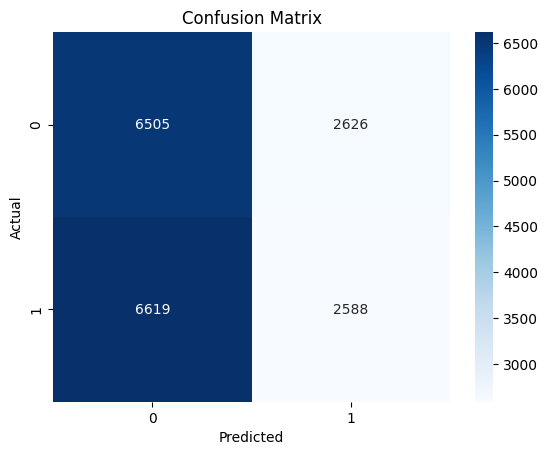

In [32]:
# Make predictions
y_pred = clf.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()